In [1]:
import os
import geopandas as gp
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [2]:
def format_df(df): # kills off whitespace and other bs 
    df.columns = [t.strip() for t in list(df)]
    df.columns = df.columns.str.replace('\s+','')  # remove whitespace from headers
    df.columns = df.columns.str.lower()
    return df

def drop_crops(df):
    allcats = df.dwrlegend.unique()
    badfields = [allcats[3],allcats[5],allcats[-2],allcats[-3], allcats[-1]] # remove     
    keep = [x for x in allcats if x.split() not in  badfields]
    result = [r for r in allcats if not any(z in r for z in badfields)]
    df = df.loc[df['dwrlegend'].isin(result)]
    return df

def filter_by_county(df,county):
    if type(county) is int:
        fin_df = df[df.countycode == county]
        return(fin_df)
    elif county is type(str):
        county = county.lower()
        df.county = df.county.str.replace('\s+','')
        df.county = df.county.str.lower()
        fin_df = df[df.county == county]
        return(fin_df)
    else:
        print(type(county))


In [3]:
lud = os.path.join(os.getcwd(), "landuse")

In [4]:
f = [os.path.join(lud,x) for x in os.listdir(lud) if x.endswith(".shp")][0]

In [5]:
shp = gp.GeoDataFrame.from_file(f)

In [7]:
shp = format_df(shp)

In [8]:
shp = drop_crops(shp)
shp = shp.to_crs(epsg=4326)


In [42]:
# Make df from lookup table
import pandas as pd
import json
file = [x for x in os.listdir(os.getcwd()) if x.endswith("json")][0]

counties = json.loads(open(file).read().decode('utf-8'))
cdf = pd.DataFrame(counties.values(),counties.keys()) 
cdf.columns = ["county"]
cdf['fips'] = cdf.index

In [45]:
fin_df = shp.merge(cdf)
fin_df['dissolve'] = fin_df.fips

In [50]:
final = fin_df.dissolve(by = "source")

In [51]:
list(final)

['geometry',
 u'acres',
 u'comments',
 u'county',
 u'crop2014',
 u'dwrlegend',
 u'dateapply',
 u'lstmoddat',
 u'modby',
 u'shape_star',
 u'shape_stle',
 'fips']

In [ ]:
final.to_file("county_ag.shp")

In [ ]:
import pandas as pd

In [10]:
county = "Tulare"
t = shp[shp.county == "Tulare"]

In [12]:
t.geometry= t.geometry.buffer(0.002)

/Users/aakashahamed/anaconda2/envs/ca_ag_ml/lib/python2.7/site-packages/geopandas/geodataframe.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


In [13]:
t = t.dissolve(by = 'source')

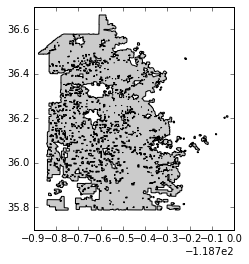

In [14]:
t.geometry.plot()
plt.show()

In [ ]:
outdir = os.path.join(os.getcwd(),"county_landuse") 
if os.path.exists(outdir):
    continue
else:
    os.mkdir(outdir)

In [ ]:
t.to_file(os.path.join(outdir,county))

In [6]:
list(shp)

[u'Acres',
 u'Comments',
 u'County',
 u'Crop2014',
 u'DWRLegend',
 u'DateApply',
 u'LstModDat',
 u'ModBy',
 u'Shape_STAr',
 u'Shape_STLe',
 u'Source',
 'geometry']

In [7]:
sf = os.path.split(os.getcwd())

In [8]:
sf

('/Users/aakashahamed/Desktop/machine_learning/final_project/ca_ag_ml/final',
 'ca_ag_ml')

In [9]:
f = '/Users/aakashahamed/Desktop/machine_learning/final_project/FP/county_shapefile/CA_Cities_TIGER2016.shp'

In [10]:
t = gp.read_file(f)

In [18]:
counties ={}
list(t)

fps = t.COUNTYFP.tolist()
fps = [x.encode("utf-8") for x in fps]
names = t.NAME.tolist()
names = [x.encode("utf-8") for x in names]

counties = dict(zip(fps,names))

#counties[t.COUNTYFP] = t.NAME

In [19]:
counties

{'001': 'Alameda',
 '003': 'Alpine',
 '005': 'Amador',
 '007': 'Butte',
 '009': 'Calaveras',
 '011': 'Colusa',
 '013': 'Contra Costa',
 '015': 'Del Norte',
 '017': 'El Dorado',
 '019': 'Fresno',
 '021': 'Glenn',
 '023': 'Humboldt',
 '025': 'Imperial',
 '027': 'Inyo',
 '029': 'Kern',
 '031': 'Kings',
 '033': 'Lake',
 '035': 'Lassen',
 '037': 'Los Angeles',
 '039': 'Madera',
 '041': 'Marin',
 '043': 'Mariposa',
 '045': 'Mendocino',
 '047': 'Merced',
 '049': 'Modoc',
 '051': 'Mono',
 '053': 'Monterey',
 '055': 'Napa',
 '057': 'Nevada',
 '059': 'Orange',
 '061': 'Placer',
 '063': 'Plumas',
 '065': 'Riverside',
 '067': 'Sacramento',
 '069': 'San Benito',
 '071': 'San Bernardino',
 '073': 'San Diego',
 '075': 'San Francisco',
 '077': 'San Joaquin',
 '079': 'San Luis Obispo',
 '081': 'San Mateo',
 '083': 'Santa Barbara',
 '085': 'Santa Clara',
 '087': 'Santa Cruz',
 '089': 'Shasta',
 '091': 'Sierra',
 '093': 'Siskiyou',
 '095': 'Solano',
 '097': 'Sonoma',
 '099': 'Stanislaus',
 '101': 'Sutter

In [22]:
import json
with open('county_lookup.json', 'w') as f:
    json.dump(counties, f)
